In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 数据导入

In [4]:
movie = pd.read_csv("../data/IMDB-Movie-Data.csv")
movie.head(1)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0


In [9]:
movie.shape

(1000, 12)

# 数据查看

## 评分的平均分

In [8]:
movie["Rating"].head()

0    8.1
1    7.0
2    7.3
3    7.2
4    6.2
Name: Rating, dtype: float64

In [10]:
movie["Rating"].mean()

6.723199999999999

## 导演的人数

In [12]:
movie["Director"].unique().shape

(644,)

# 数据分布情况

## Rating

### 画图查看分布

<AxesSubplot: ylabel='Frequency'>

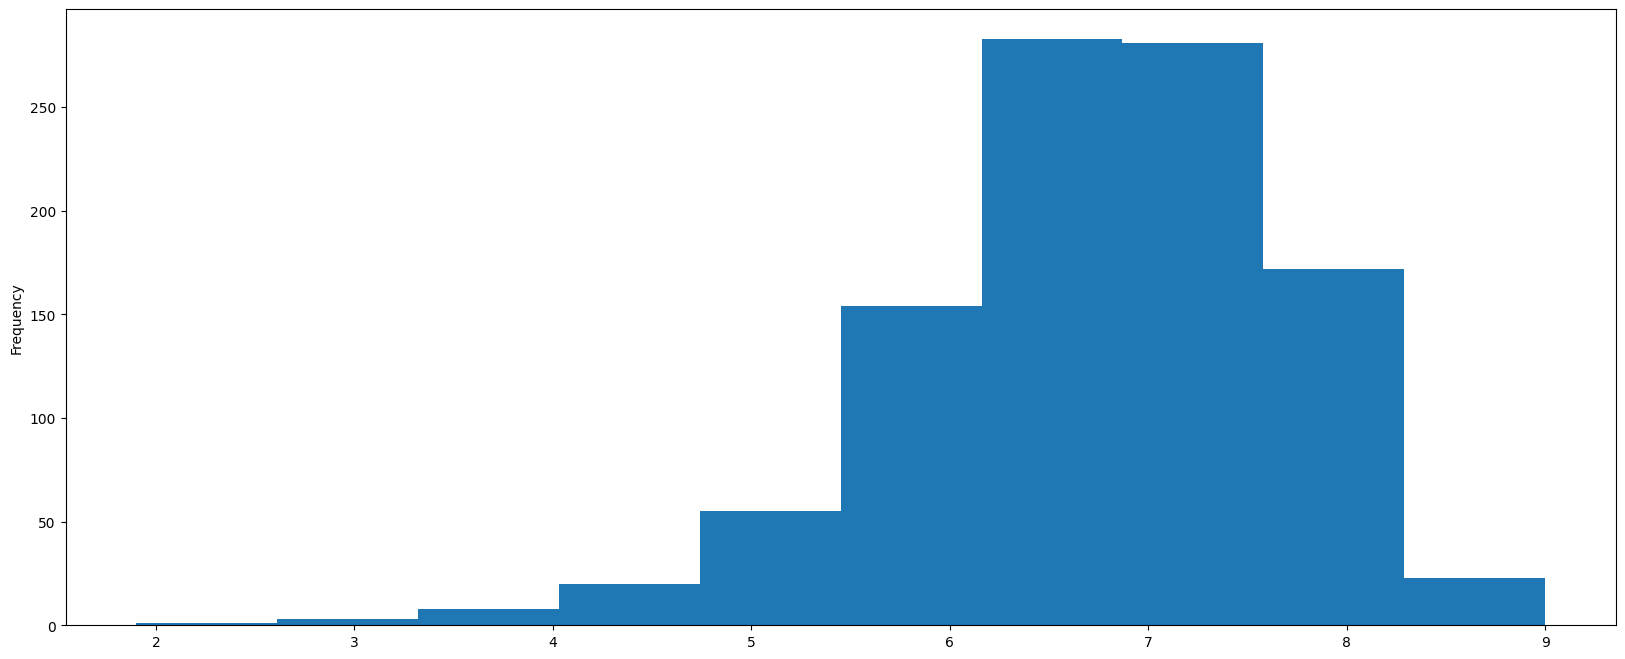

In [13]:
movie["Rating"].plot(kind="hist", figsize=(20, 8))
# 显示不好,x轴对不齐

(array([  1.,   0.,   2.,   1.,   2.,   6.,   7.,  13.,  15.,  40.,  78.,
         76., 156., 127., 171., 110., 117.,  55.,  20.,   3.]),
 array([1.9  , 2.255, 2.61 , 2.965, 3.32 , 3.675, 4.03 , 4.385, 4.74 ,
        5.095, 5.45 , 5.805, 6.16 , 6.515, 6.87 , 7.225, 7.58 , 7.935,
        8.29 , 8.645, 9.   ]),
 <BarContainer object of 20 artists>)

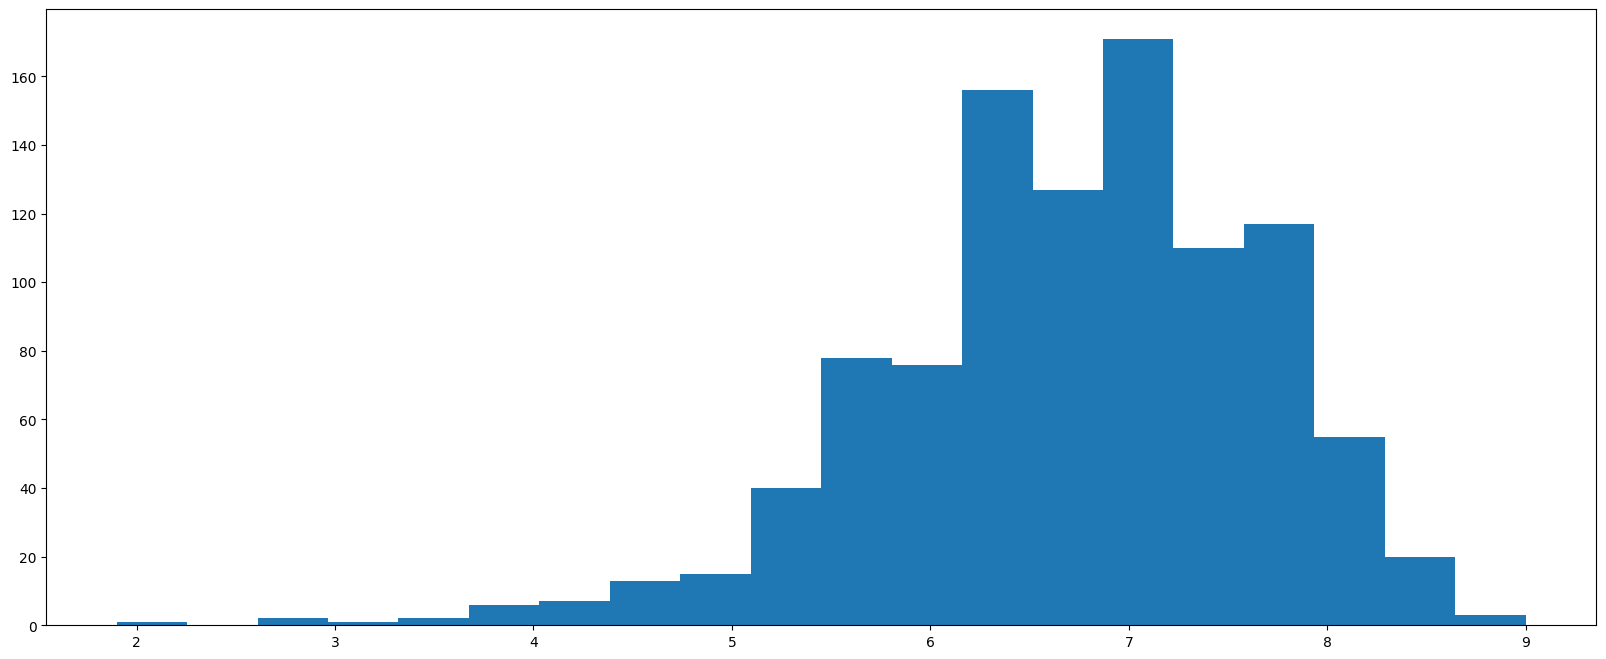

In [14]:
plt.figure(figsize=(20, 8), dpi=100)
plt.hist(movie["Rating"].values, bins=20)
# 还是显示不齐

### 20条数据,将刻度分为21个

将Rating从最小最大分为21个,设置为x轴

In [16]:
min_rating = movie["Rating"].min()
max_rating = movie["Rating"].max()
min_rating, max_rating

(1.9, 9.0)

In [17]:
# linspace包含结尾,arange不包含结果
x1 = np.linspace(min_rating, max_rating, 21)
x1

array([1.9  , 2.255, 2.61 , 2.965, 3.32 , 3.675, 4.03 , 4.385, 4.74 ,
       5.095, 5.45 , 5.805, 6.16 , 6.515, 6.87 , 7.225, 7.58 , 7.935,
       8.29 , 8.645, 9.   ])

(array([  1.,   0.,   2.,   1.,   2.,   6.,   7.,  13.,  15.,  40.,  78.,
         76., 156., 127., 171., 110., 117.,  55.,  20.,   3.]),
 array([1.9  , 2.255, 2.61 , 2.965, 3.32 , 3.675, 4.03 , 4.385, 4.74 ,
        5.095, 5.45 , 5.805, 6.16 , 6.515, 6.87 , 7.225, 7.58 , 7.935,
        8.29 , 8.645, 9.   ]),
 <BarContainer object of 20 artists>)

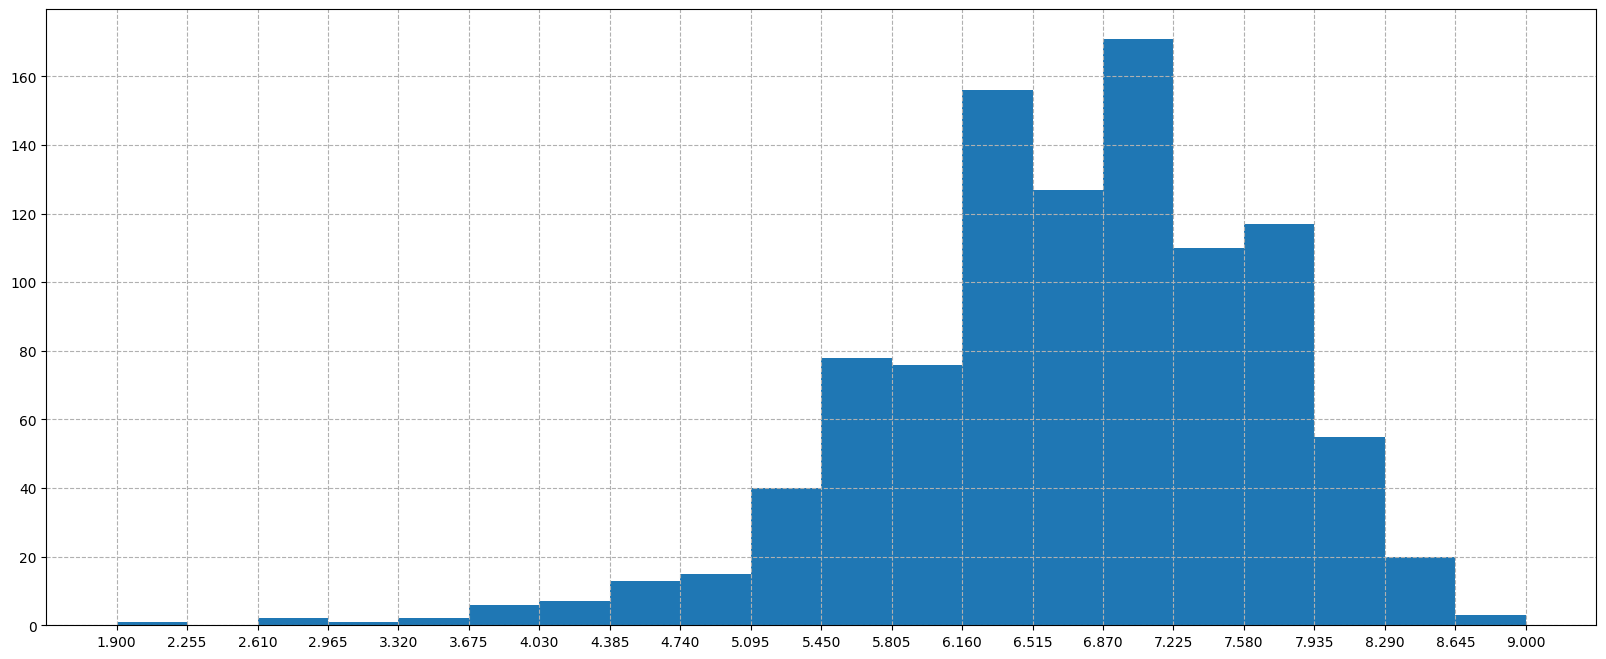

In [18]:
plt.figure(figsize=(20, 8), dpi=100)

plt.xticks(x1)

plt.grid(True, linestyle="--")
plt.hist(movie["Rating"].values, bins=20)

## Runtime (Minutes)

### 20条数据,将刻度分为21个

将Rating从最小最大分为21个,设置为x轴

In [21]:
min_runtime = movie["Runtime (Minutes)"].min()
max_runtime = movie["Runtime (Minutes)"].max()
min_runtime, max_runtime

(66, 191)

In [22]:
# linspace包含结尾,arange不包含结果
x1 = np.linspace(min_runtime, max_runtime, 21)
x1

array([ 66.  ,  72.25,  78.5 ,  84.75,  91.  ,  97.25, 103.5 , 109.75,
       116.  , 122.25, 128.5 , 134.75, 141.  , 147.25, 153.5 , 159.75,
       166.  , 172.25, 178.5 , 184.75, 191.  ])

(array([  1.,   2.,  17.,  61., 129., 127., 136., 132., 126.,  82.,  65.,
         33.,  31.,  21.,  12.,  14.,   6.,   0.,   3.,   2.]),
 array([ 66.  ,  72.25,  78.5 ,  84.75,  91.  ,  97.25, 103.5 , 109.75,
        116.  , 122.25, 128.5 , 134.75, 141.  , 147.25, 153.5 , 159.75,
        166.  , 172.25, 178.5 , 184.75, 191.  ]),
 <BarContainer object of 20 artists>)

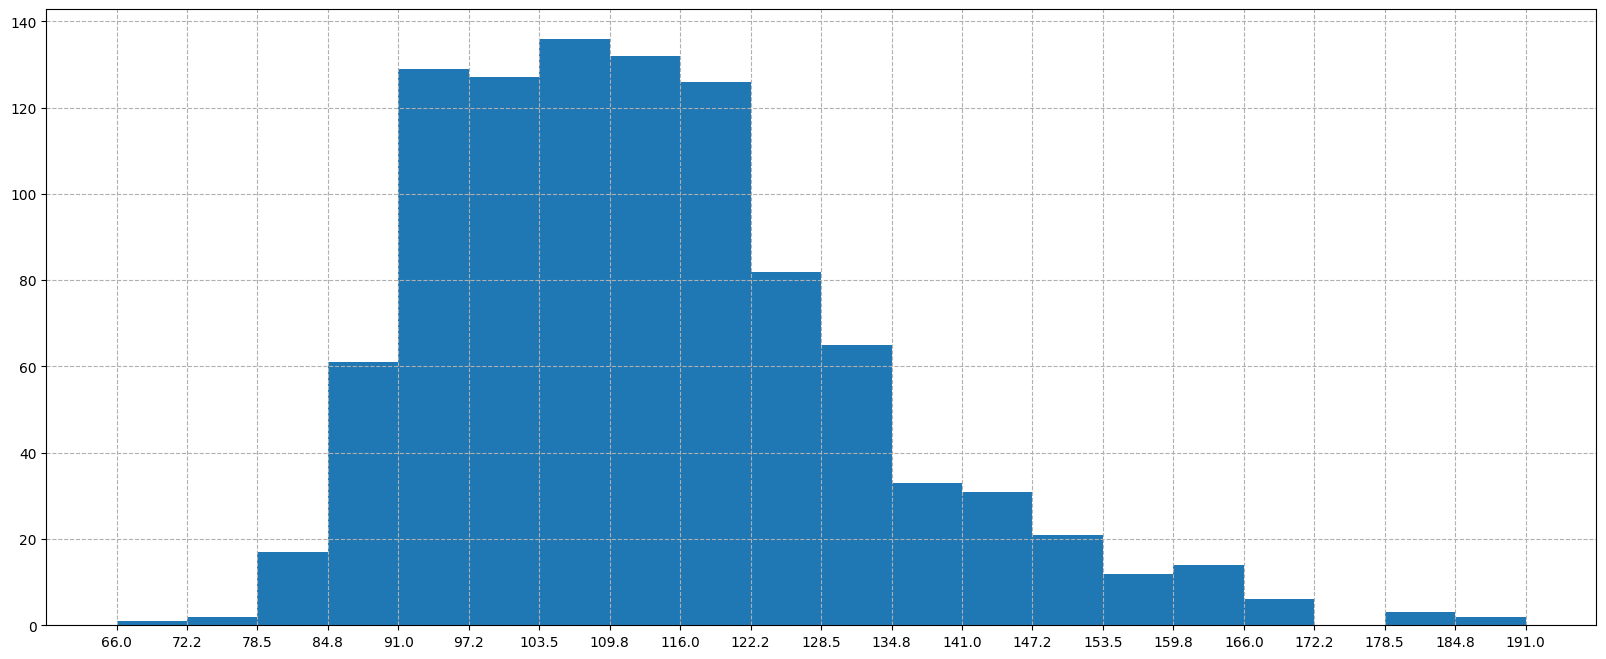

In [24]:
plt.figure(figsize=(20, 8), dpi=100)

plt.xticks(x1)

plt.grid(True, linestyle="--")
plt.hist(movie["Runtime (Minutes)"].values, bins=20)

## 电影分类(genre)

In [27]:
# 一个电影有多个分类
movie["Genre"][:10]

0       Action,Adventure,Sci-Fi
1      Adventure,Mystery,Sci-Fi
2               Horror,Thriller
3       Animation,Comedy,Family
4      Action,Adventure,Fantasy
5      Action,Adventure,Fantasy
6            Comedy,Drama,Music
7                        Comedy
8    Action,Adventure,Biography
9       Adventure,Drama,Romance
Name: Genre, dtype: object

### 找到每个电影的分类,每个电影的分类放入一个列表中

In [31]:
# 进行字符串分割 电影分类,使用逗号分隔 二维列表
movie_genre_list = [i.split(",") for i in movie["Genre"]]
movie_genre_list[:10]

[['Action', 'Adventure', 'Sci-Fi'],
 ['Adventure', 'Mystery', 'Sci-Fi'],
 ['Horror', 'Thriller'],
 ['Animation', 'Comedy', 'Family'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Comedy', 'Drama', 'Music'],
 ['Comedy'],
 ['Action', 'Adventure', 'Biography'],
 ['Adventure', 'Drama', 'Romance']]

### 获取不重复分类列表

In [37]:
genre_list = []
for movie_genre in movie_genre_list:
    for genre in movie_genre:
        genre_list.append(genre)
genre_list[:10]

['Action',
 'Adventure',
 'Sci-Fi',
 'Adventure',
 'Mystery',
 'Sci-Fi',
 'Horror',
 'Thriller',
 'Animation',
 'Comedy']

In [38]:
len(genre_list)

2555

In [41]:
# 取重
genre_list = np.unique(genre_list)
len(genre_list)

20

### 生成 [电影长度, 电影类型] 的全为0的DataFrame

用来存储是否是此类型的电影

In [42]:
# 所有电影的行数     上面电影分类的行
zeros = np.zeros([movie.shape[0], genre_list.shape[0]])
zeros

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
movie_genre_df = pd.DataFrame(zeros, columns=genre_list)
movie_genre_df.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 将电影类型放入DataFrame

In [47]:
# 遍历每一部电影, movie_genre_df中把分类出现的列的值置为1
# movie_genre_list 是电影的column行名称的列表
for i in range(movie.shape[0]):
    movie_genre_df.loc[i, movie_genre_list[i]] = 1
movie_genre_df.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 类型数求和

In [50]:
movie_genre_df.sum()

Action       303.0
Adventure    259.0
Animation     49.0
Biography     81.0
Comedy       279.0
Crime        150.0
Drama        513.0
Family        51.0
Fantasy      101.0
History       29.0
Horror       119.0
Music         16.0
Musical        5.0
Mystery      106.0
Romance      141.0
Sci-Fi       120.0
Sport         18.0
Thriller     195.0
War           13.0
Western        7.0
dtype: float64

In [51]:
# 排序
movie_genre_df.sum().sort_values(ascending=False)

Drama        513.0
Action       303.0
Comedy       279.0
Adventure    259.0
Thriller     195.0
Crime        150.0
Romance      141.0
Sci-Fi       120.0
Horror       119.0
Mystery      106.0
Fantasy      101.0
Biography     81.0
Family        51.0
Animation     49.0
History       29.0
Sport         18.0
Music         16.0
War           13.0
Western        7.0
Musical        5.0
dtype: float64

<AxesSubplot: >

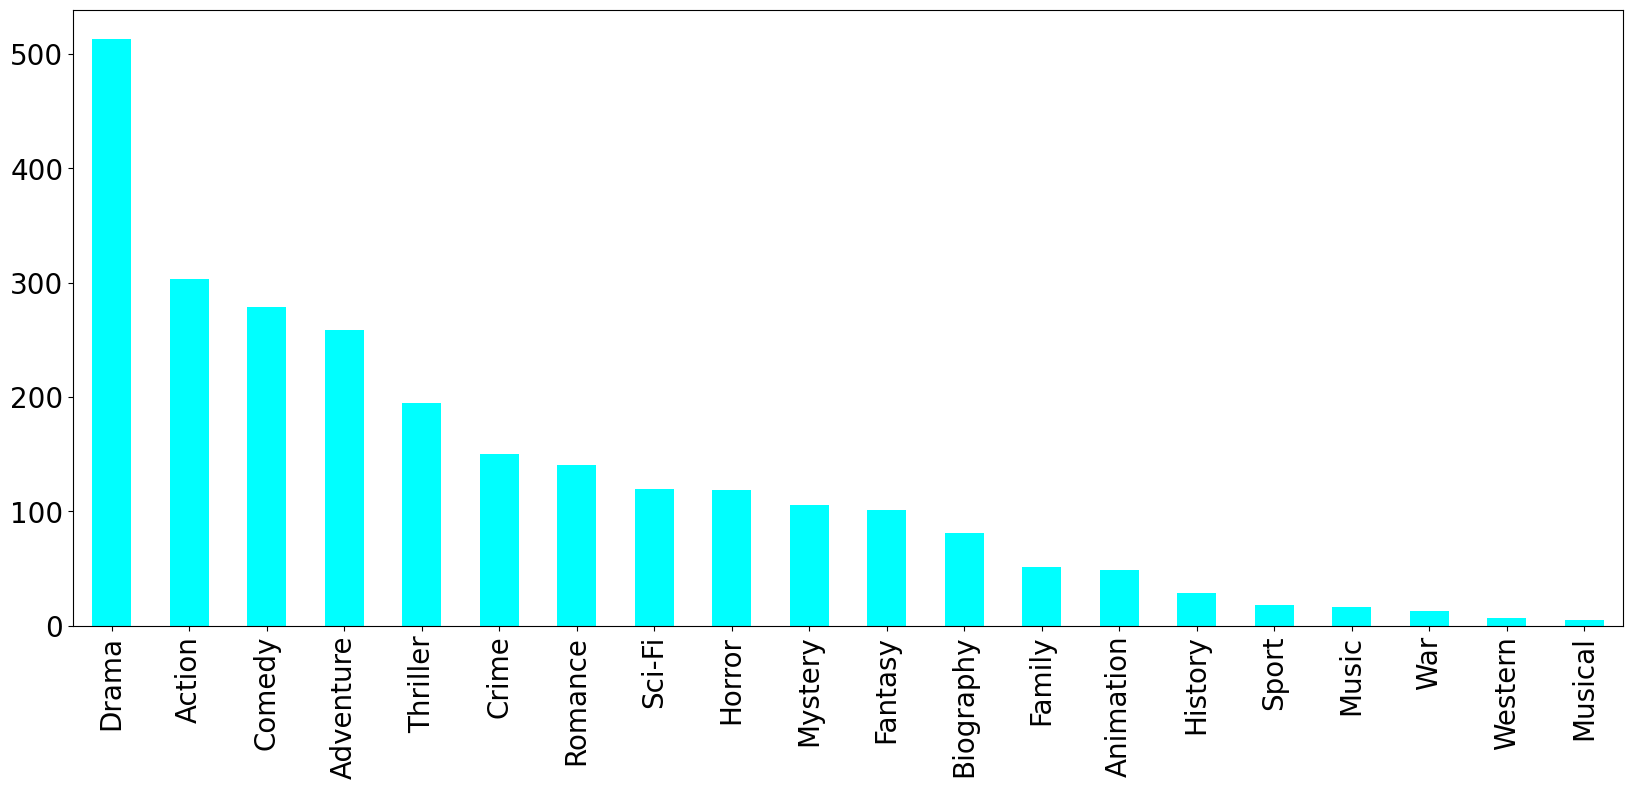

In [53]:
movie_genre_df.sum().sort_values(ascending=False).plot(
    kind="bar", figsize=(20, 8), fontsize=20, colormap="cool"
)